# Домашняя работа 2

In [443]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from IPython.display import Image

In [444]:
G = nx.read_gml("lesmis.gml")

In [445]:
plt.figure(figsize=(10,10))
nx.draw(G, node_color="gold", node_size=300, alpha=0.8, with_labels=True)

Найдём количество клик в графе (т.е. всех таких подграфов, чтобы каждая вершина была смежной со всеми вершинами в данном подграфе).

In [446]:
print nx.graph_number_of_cliques(G)

59


Найдём и нарисуем самую большую клику.

In [478]:
cliques = list(nx.find_cliques(G)) 
largest = max(cliques, key=lambda x:len(x))
print(largest)

[u'Joly', u'Gavroche', u'Bahorel', u'Enjolras', u'Courfeyrac', u'Bossuet', u'Combeferre', u'Feuilly', u'Prouvaire', u'Grantaire']


In [521]:
plt.figure(figsize=(6,6))
largest_G = G.subgraph(largest)
nx.draw_circular(largest_G, node_color="lime", node_size=300, alpha=0.7, with_labels=True)

Этот подграф показывает наибольшую группу людей, каждый из которых знаком со всеми членами группы.

### Cores

In [514]:
cores = nx.core_number(G)
print cores

{u'Gueulemer': 8, u'MlleBaptistine': 3, u'Fantine': 7, u'MlleVaubois': 1, u'MmeBurgon': 1, u'Javert': 8, u'Cochepaille': 6, u'Chenildieu': 6, u'Cosette': 6, u'Babet': 8, u'MmeThenardier': 7, u'Valjean': 8, u'Enjolras': 9, u'Toussaint': 3, u'MmeMagloire': 3, u'Champtercier': 1, u'MlleGillenormand': 4, u'Grantaire': 9, u'Woman1': 2, u'Child1': 2, u'Child2': 2, u'Bamatabois': 6, u'Woman2': 3, u'Favourite': 7, u'Claquesous': 8, u'Gillenormand': 4, u'Fameuil': 7, u'Pontmercy': 2, u'Labarre': 1, u'Feuilly': 9, u'Perpetue': 2, u'Montparnasse': 8, u'Judge': 6, u'Dahlia': 7, u'Scaufflaire': 1, u'Brujon': 7, u'MotherInnocent': 2, u'Napoleon': 1, u'Count': 1, u'Combeferre': 9, u'Isabeau': 1, u'Eponine': 8, u'MmePontmercy': 2, u'Champmathieu': 6, u'Tholomyes': 7, u'Simplice': 3, u'Anzelma': 3, u'Zephine': 7, u'Jondrette': 1, u'Fauchelevent': 2, u'Courfeyrac': 9, u'Blacheville': 7, u'Gribier': 1, u'Bossuet': 9, u'Prouvaire': 9, u'MmeDeR': 1, u'Mabeuf': 9, u'LtGillenormand': 4, u'Listolier': 7, u'Br

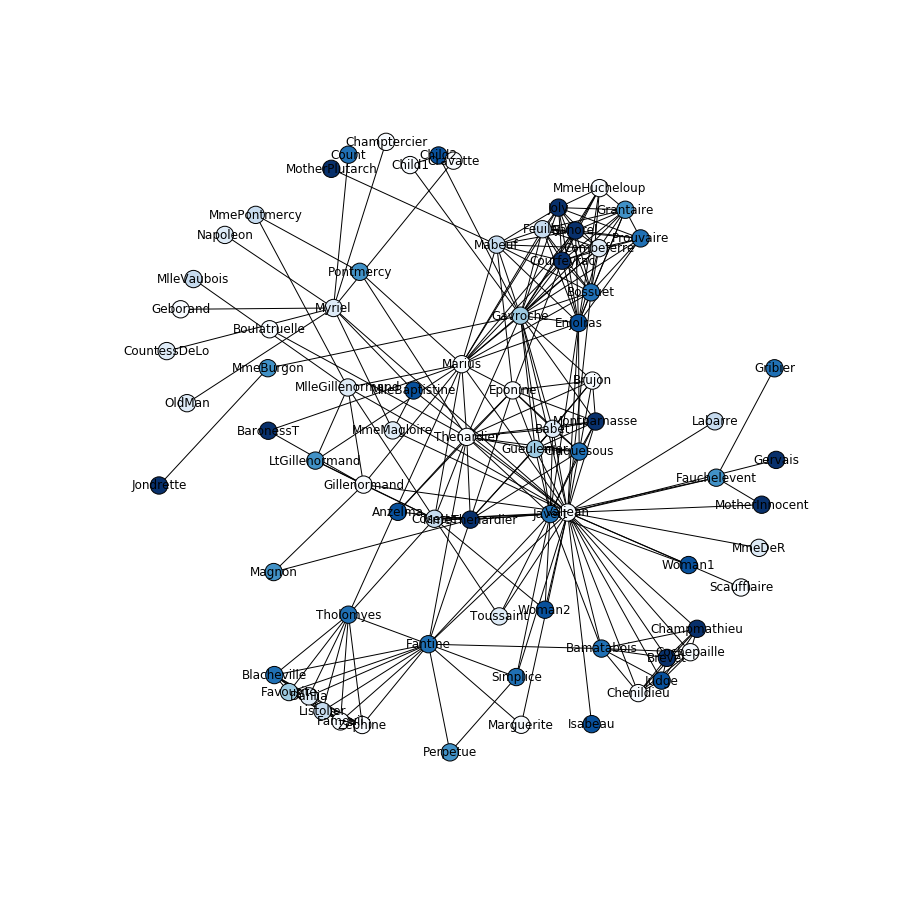

In [516]:
plt.figure(figsize=(12,12))
nx.draw(G,with_labels=True,node_color=cores.values(), cmap=plt.cm.Blues)

k-cores – это группы людей, у которых количество связей не меньше k. Посмотрим на несколько таких групп.

In [517]:
for i in range(1,5): print i, list(nx.k_core(G,i))

1 [u'Gueulemer', u'MlleBaptistine', u'Fantine', u'MlleVaubois', u'MmeBurgon', u'Javert', u'Cochepaille', u'Chenildieu', u'Cosette', u'Babet', u'MmeThenardier', u'Valjean', u'Enjolras', u'Toussaint', u'MmeMagloire', u'Champtercier', u'Geborand', u'MlleGillenormand', u'Grantaire', u'Woman1', u'Child1', u'Child2', u'Bamatabois', u'Woman2', u'Favourite', u'Claquesous', u'Scaufflaire', u'Pontmercy', u'Labarre', u'Feuilly', u'Perpetue', u'Montparnasse', u'Judge', u'Dahlia', u'Brujon', u'MotherInnocent', u'Napoleon', u'Count', u'Combeferre', u'Isabeau', u'Eponine', u'MmePontmercy', u'Champmathieu', u'Tholomyes', u'Gillenormand', u'Anzelma', u'Zephine', u'Jondrette', u'Fauchelevent', u'Courfeyrac', u'Blacheville', u'Gribier', u'Bossuet', u'Prouvaire', u'MmeDeR', u'Mabeuf', u'LtGillenormand', u'Simplice', u'Brevet', u'Marguerite', u'Gavroche', u'Myriel', u'Magnon', u'Bahorel', u'MmeHucheloup', u'Thenardier', u'BaronessT', u'Joly', u'OldMan', u'Cravatte', u'Boulatruelle', u'CountessDeLo', u'Gerv

In [518]:
max(cores.values())

9

Это означает, что наибольшее возможное количество связей у узлов в графе – это 9. Условно говоря, это самые общительные люди в данной социальной сети.

Нарисуем теперь узлы в соответствии с принадлежностью к k-core. Начнём k = 9, то есть нарисуем такой подграф, чтобы у всех узлов было 9 связей.

In [526]:
Gkc = G.subgraph(nx.k_core(G,9))

In [528]:
plt.figure(figsize=(8,8))
for v in Gkc.nodes(data=True): v[1]['color']='lightskyblue'
for v in largest: Gkc.node[v]['color']='navy'
nx.draw_circular(Gkc,with_labels=True,node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

Более темным цветом отмечены те люди, которые ещё при этом принадлежат самой большой клике в графе (то есть к той группе максимального размера, где каждый знаком с каждым).
В общем, эти люди – монстры общения и поддержания связей.

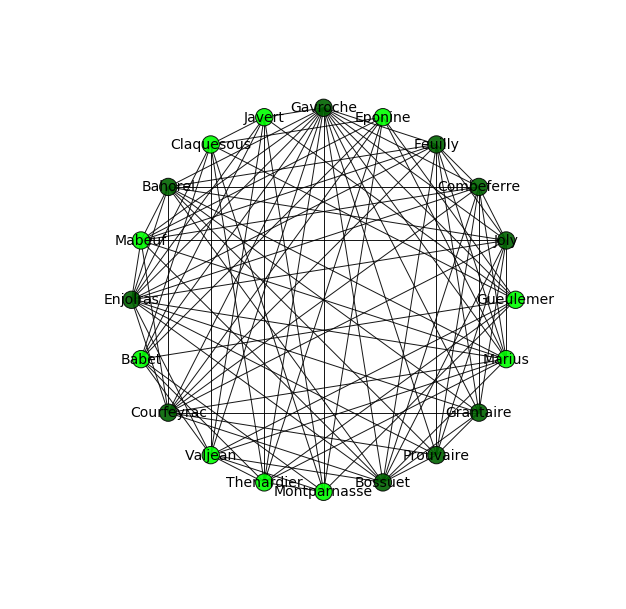

In [529]:
Gkc = G.subgraph(nx.k_core(G,8))
plt.figure(figsize=(8,8))
for v in Gkc.nodes(data=True): v[1]['color']='lime'
for v in largest: Gkc.node[v]['color']='darkgreen'
nx.draw_circular(Gkc,with_labels=True, font_size=14,
                 node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

У каждого человека в этом подграфе не менее 8 связей (то есть все люди из core_9 тоже сюда входят). И снова: более темным цветом отмечены те люди, которые ещё при этом принадлежат самой большой клике в графе.

In [530]:
Gkc = G.subgraph(nx.k_core(G,7))
plt.figure(figsize=(10,10))
for v in Gkc.nodes(data=True): v[1]['color']='gold'
for v in largest: Gkc.node[v]['color']='orange'
nx.draw_circular(Gkc,with_labels=True, font_size=14,
                 node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

In [531]:
Gkc = G.subgraph(nx.k_shell(G,1))
plt.figure(figsize=(10,10))
for v in Gkc.nodes(data=True): v[1]['color']='aqua'
nx.draw_circular(Gkc,with_labels=True, font_size=14, node_color='aqua', alpha=0.9)

А вот это самые асоциальные личности...

## Community analysis

In [533]:
import community
partition = community.best_partition(G)

Посмотрим, как можно поделить наше комьюнити на группы.

In [534]:
for i in set(partition.values()):
   print "Community", i
   print [nodes for nodes in partition.keys() if partition[nodes] == i]

Community 0
[u'Grantaire', u'Child1', u'Child2', u'Enjolras', u'Feuilly', u'Courfeyrac', u'Bossuet', u'Mabeuf', u'Gavroche', u'Bahorel', u'MmeHucheloup', u'Joly', u'Combeferre', u'Prouvaire', u'MotherPlutarch', u'Marius']
Community 1
[u'MlleBaptistine', u'Champtercier', u'Geborand', u'Count', u'CountessDeLo', u'OldMan', u'MmeMagloire', u'Napoleon', u'Myriel', u'Cravatte']
Community 2
[u'Perpetue', u'Blacheville', u'Tholomyes', u'Dahlia', u'Listolier', u'Marguerite', u'Fantine', u'Favourite', u'Zephine', u'Fameuil', u'Simplice']
Community 3
[u'MlleVaubois', u'Pontmercy', u'Magnon', u'BaronessT', u'MlleGillenormand', u'LtGillenormand', u'MmePontmercy', u'Gillenormand']
Community 4
[u'Jondrette', u'MmeBurgon']
Community 5
[u'Javert', u'Toussaint', u'Eponine', u'Anzelma', u'Cosette', u'Gueulemer', u'Babet', u'MmeThenardier', u'Woman2', u'Montparnasse', u'Brujon', u'Woman1', u'Thenardier', u'Claquesous', u'Boulatruelle']
Community 6
[u'Chenildieu', u'Labarre', u'Judge', u'Brevet', u'MmeDeR'

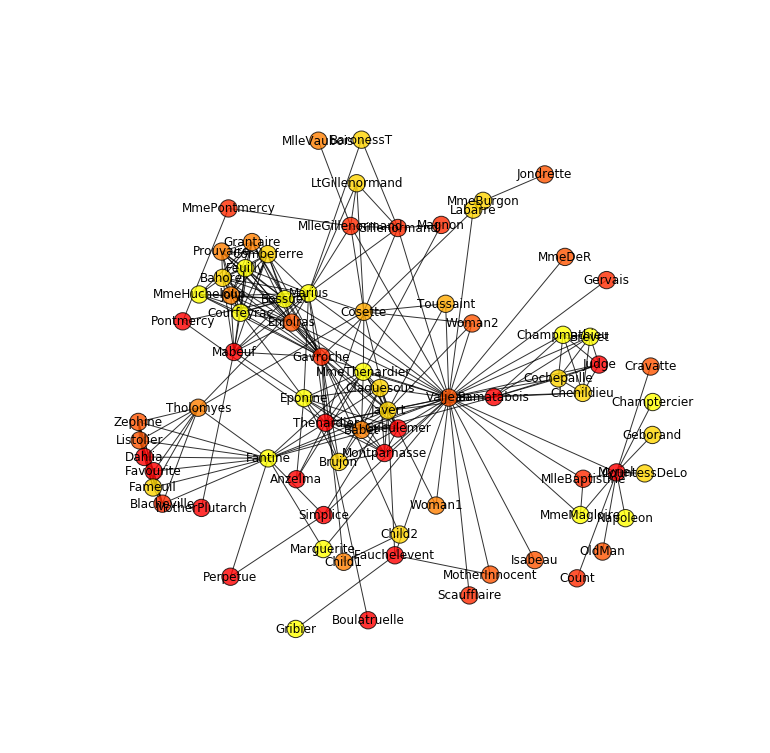

In [536]:
plt.figure(figsize=(10,10))
nx.draw(G, cmap = plt.get_cmap('autumn'), node_color = partition.values(), node_size=300, alpha=0.8,with_labels=True)

In [538]:
community.modularity(partition,G)

0.5529558559117118

Модулярность примерно 55 процентов, то есть, нельзя сказать, что данное разбиение графа является выраженным (т.е. группы в графе не являются чётко оформленными, то что называется well formedness)

### Транзитивность графа и триады
Чтобы узнать triadic census для данного графа, нужно сделать его направленным.

In [367]:
DG=nx.DiGraph(G)
plt.figure(figsize=(10,10))
nx.draw(DG, node_size=300, alpha=0.8,with_labels=True, node_color="cyan")

In [539]:
node_census = nx.triadic_census(DG)
x = []
for key in node_census:
    x.append((key, node_census[key]))
pprint(sorted(x,key=lambda a:a[1], reverse=True))

[('003', 56441),
 ('102', 14835),
 ('201', 1407),
 ('300', 467),
 ('021C', 0),
 ('021D', 0),
 ('210', 0),
 ('120U', 0),
 ('030C', 0),
 ('012', 0),
 ('021U', 0),
 ('120D', 0),
 ('111U', 0),
 ('030T', 0),
 ('120C', 0),
 ('111D', 0)]


Видно, что в графе встречаются триады следующих типов: 003, 102, 201 и 300 (на картинке изображены под номерами 1, 8, 14 и 16). Из этих триад полностью транзитивной является только тип 300.

Отобразим это распределение на гистограмме.

In [400]:
Image('triads.png')

In [401]:
plt.bar(numpy.arange(16),node_census.values(),width=1)
plt.xticks(numpy.arange(16)+0.5, tuple(node_census.keys()),rotation='vertical',fontsize=12)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [426]:
node_transitivity = nx.transitivity(DG)
print(node_transitivity)

0.498931623932


Транзитивность этого графа чуть меньше 0.5. Это означает, что если разбить людей в этой социальной сети на группы по три человека, почти в половине таких групп люди окажутся знакомыми каждый с каждым.

# Граф 2

In [540]:
g = []
with open("ca-GrQc.txt", 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        line = [int(l) for l in line]
        g.append(line)
G = nx.Graph()
G.add_edges_from(g)

In [541]:
print nx.graph_number_of_cliques(G)

3906


В графе очень много клик. Посмотрим, какая из них максимальная.

In [544]:
cliques = list(nx.find_cliques(G)) 
largest = max(cliques, key=lambda x:len(x))
print(largest)
print(len(largest))

[21012, 22691, 773, 14807, 3372, 2741, 21847, 24955, 25346, 21508, 2952, 20108, 7956, 20635, 15003, 17692, 25758, 4513, 12781, 21281, 6179, 2212, 15659, 12365, 12496, 19961, 4164, 22887, 11241, 17655, 14540, 45, 6610, 6830, 18894, 8879, 11472, 20562, 12851, 9785, 570, 19423, 23293, 1653]
44


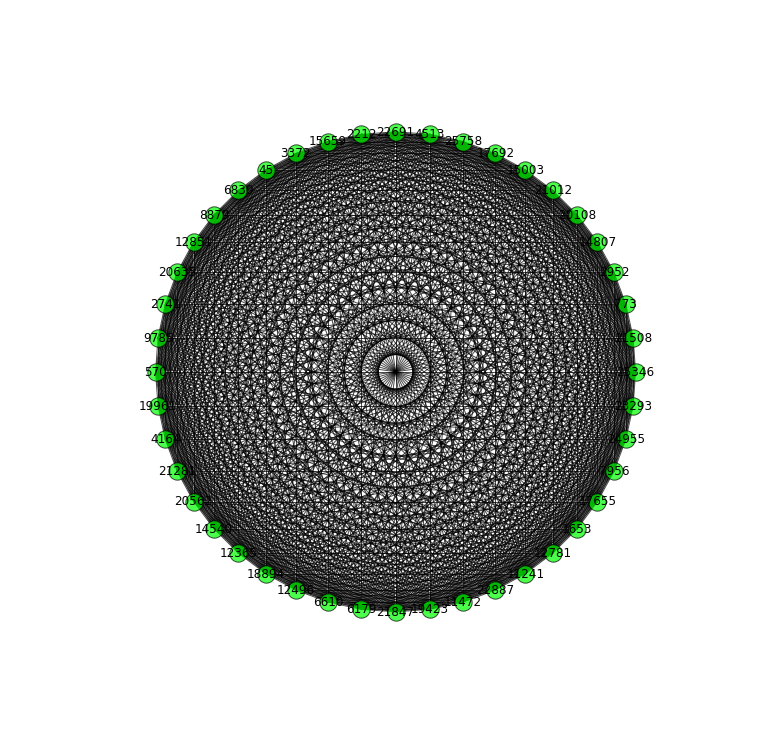

In [546]:
plt.figure(figsize=(10,10))
largest_G = G.subgraph(largest)
nx.draw_circular(largest_G, node_color="lime", node_size=300, alpha=0.7, with_labels=True)

Аж 44 автора работали вместе хотя бы над одной статьёй (т.е. работал каждый с каждым).

# Cores

In [555]:
G.remove_edges_from(G.selfloop_edges())
cores = nx.core_number(G)
print(max(cores.values()))

43


Так как в графе есть петли, мы их удалили (чтобы можно было посчитать k-cores.)
Теперь нарисуем подграфы, где у всех узлов степень не меньше k = 43, 42 и 41.

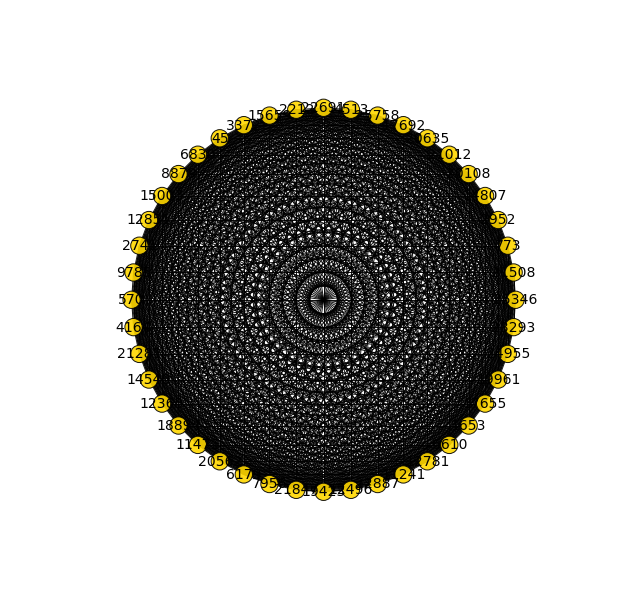

In [560]:
Gkc = G.subgraph(nx.k_core(G,43))
plt.figure(figsize=(8,8))
for v in Gkc.nodes(data=True): v[1]['color']='gold'
nx.draw_circular(Gkc,with_labels=True, font_size=14,
                 node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

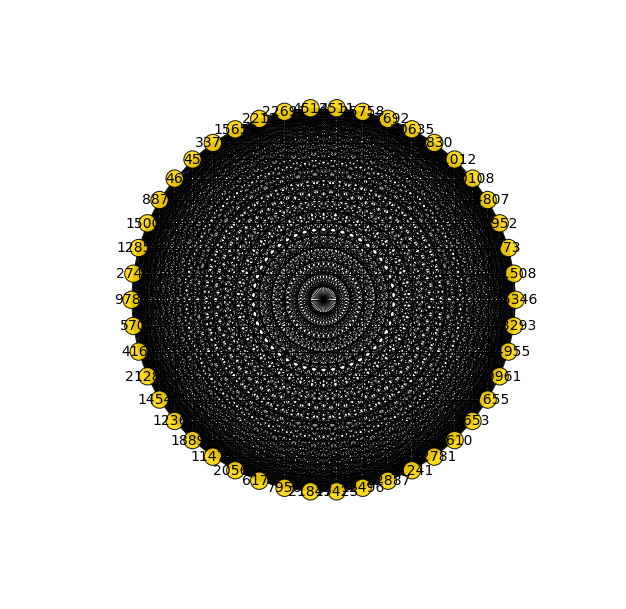

In [561]:
Gkc = G.subgraph(nx.k_core(G,42))
plt.figure(figsize=(8,8))
for v in Gkc.nodes(data=True): v[1]['color']='gold'
nx.draw_circular(Gkc,with_labels=True, font_size=14,
                 node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

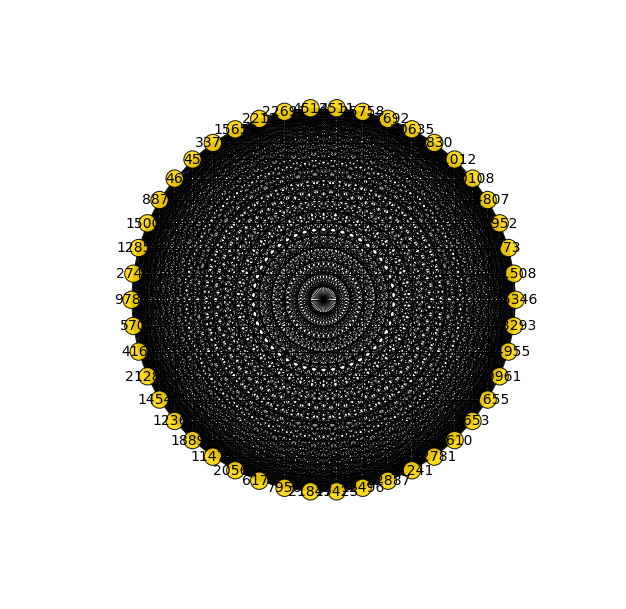

In [588]:
Gkc = G.subgraph(nx.k_core(G,41))
plt.figure(figsize=(8,8))
for v in Gkc.nodes(data=True): v[1]['color']='gold'
nx.draw_circular(Gkc,with_labels=True, font_size=14,
                 node_color= [x[1]['color'] for x in Gkc.nodes(data=True)], alpha=0.9)

In [581]:
import community
partition = community.best_partition(G)
print(max(partition.values()))

393


Всего 393 группы авторов можно выделить в community. Нарисовать весь граф не получилось, notebook зависает, поэтому нарисуем несколько разных групп авторов, выделеленных делением partition.

In [622]:
a = {}
for p in partition:
    if partition[p] == 0:
        a[p] = 'crimson'
    if partition[p] == 1:
        a[p] = 'gold'
    if partition[p] == 2:
        a[p] = 'lightgreen'
    if partition[p] == 3:
        a[p] = 'cyan'
    if partition[p] == 4:
        a[p] = 'midnightblue'
    if partition[p] == 5:
        a[p] = 'darkorchid'
Gs = G.subgraph(list(a.keys()))
print(list(a.keys()))

[22528, 23552, 22530, 8195, 16389, 24582, 8193, 8200, 16393, 24587, 15617, 24578, 6158, 21165, 6160, 24, 18457, 11951, 16414, 15365, 6832, 20515, 12324, 20517, 8231, 6184, 24583, 16429, 20526, 15209, 16433, 10640, 7324, 18489, 19807, 8254, 10251, 20550, 22599, 78, 80, 81, 16469, 20568, 18788, 8282, 25615, 22621, 12389, 8299, 16495, 114, 4211, 22644, 20597, 16505, 16506, 124, 18557, 16513, 10871, 16521, 141, 2072, 24722, 8340, 10390, 10391, 24734, 8352, 14498, 20645, 22696, 16554, 6317, 8367, 4275, 18612, 20663, 8376, 16570, 16576, 18625, 4290, 17099, 197, 10438, 20683, 16589, 4302, 2255, 14371, 23246, 14550, 8408, 23665, 14558, 16607, 10468, 22758, 10620, 4135, 15400, 6390, 22778, 10623, 24835, 2309, 22790, 12552, 25582, 10967, 16659, 6190, 22806, 8471, 283, 24860, 22815, 18720, 6434, 2342, 12337, 11944, 2348, 9266, 8925, 22832, 20787, 18742, 12599, 8505, 22239, 8928, 8876, 9217, 18758, 4428, 8589, 15416, 20827, 24924, 4446, 9616, 15419, 24932, 18790, 18791, 10600, 8553, 6506, 25319, 3

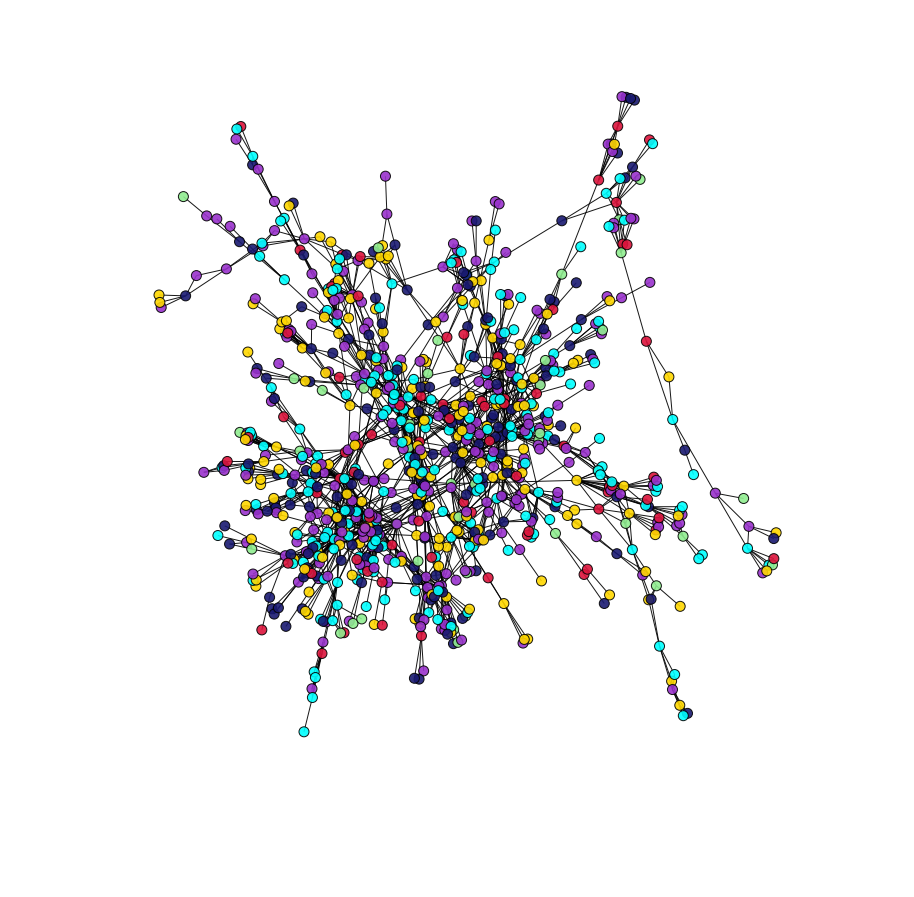

In [623]:
plt.figure(figsize=(12,12))
nx.draw(Gs, with_labels=False, node_color=a.values(), alpha=0.9, node_size=100)

Граф слишком большой, чтобы нарисовать его здесь, поэтому я включила в граф только 6 групп из 393, полученных делением графа.
Различными цветами показана принадлежность узлов к разным группам.

In [624]:
a = {}
for p in partition:
    if partition[p] == 6:
        a[p] = 'crimson'
    if partition[p] == 7:
        a[p] = 'gold'
    if partition[p] == 8:
        a[p] = 'lightgreen'
    if partition[p] == 9:
        a[p] = 'cyan'
    if partition[p] == 10:
        a[p] = 'midnightblue'
    if partition[p] == 11:
        a[p] = 'darkorchid'
Gs = G.subgraph(list(a.keys()))
print(list(a.keys()))

[25856, 2049, 16264, 17923, 1028, 17414, 23809, 13320, 13322, 15372, 13, 8208, 24593, 24594, 8211, 21853, 5143, 23576, 23577, 5251, 18971, 22556, 17439, 546, 7717, 20511, 12380, 10026, 21548, 20317, 4383, 14344, 6835, 13364, 5730, 20534, 18487, 17464, 12980, 12639, 12860, 5182, 9413, 22083, 580, 17990, 15943, 1101, 13837, 1104, 25272, 5202, 24163, 24148, 2133, 11613, 25201, 20569, 20059, 3164, 14976, 2654, 9755, 23649, 3682, 22269, 2661, 8721, 23145, 25304, 12306, 624, 22376, 19059, 628, 25205, 12637, 5481, 8824, 14969, 21315, 24699, 5579, 24597, 12928, 7811, 11910, 4743, 11402, 5771, 4748, 8335, 8641, 3730, 3731, 6364, 16022, 10456, 15005, 4255, 21152, 4258, 1699, 165, 17575, 25107, 10183, 7853, 23730, 23219, 6675, 18613, 17590, 19640, 884, 18619, 4284, 18122, 18622, 15623, 5825, 17603, 9924, 4293, 7878, 22727, 6857, 2250, 21707, 24781, 13714, 2339, 22744, 22233, 7386, 3804, 18042, 2785, 19170, 19683, 24293, 24295, 14547, 3310, 16624, 19697, 22770, 26067, 10878, 18455, 22779, 18685, 1

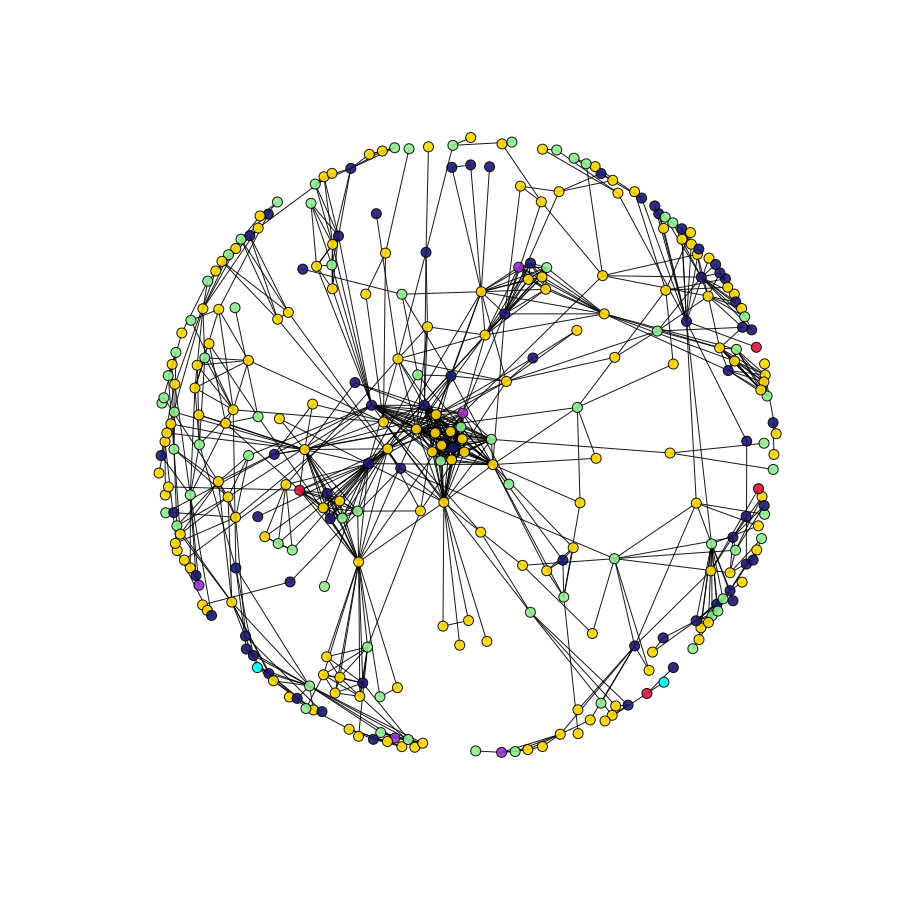

In [625]:
plt.figure(figsize=(12,12))
nx.draw(Gs, with_labels=False, node_color=a.values(), alpha=0.9, node_size=100)

Это следующая шестёрка групп.

[14337, 4103, 4104, 11607, 18445, 22, 8215, 12312, 24601, 26, 27, 28, 29, 8222, 16415, 8224, 20513, 11611, 20519, 25607, 4141, 12296, 4148, 20149, 11275, 70, 6219, 2124, 14414, 2127, 22609, 6226, 12373, 4183, 18522, 22620, 93, 2142, 10597, 11801, 106, 2155, 15399, 16496, 113, 21523, 18549, 8310, 6266, 123, 16511, 13026, 140, 15384, 4242, 18579, 18582, 4249, 18586, 18587, 8219, 14500, 18597, 18600, 6316, 16755, 20660, 16575, 195, 4298, 13346, 8403, 14552, 16608, 6376, 21543, 10478, 2771, 18676, 8437, 253, 16644, 8458, 272, 6421, 2326, 4376, 20765, 16675, 20772, 2341, 20775, 20779, 20781, 14638, 22839, 10552, 18745, 315, 15559, 2368, 6468, 18757, 15082, 8523, 23266, 8526, 4431, 6482, 18772, 16727, 12640, 12641, 8547, 16741, 22888, 10601, 16747, 365, 16751, 6513, 4467, 14710, 15081, 4472, 12665, 380, 13034, 4484, 1430, 9964, 16779, 4493, 2451, 8596, 20886, 10655, 16800, 20902, 22954, 25006, 20924, 14781, 18880, 16834, 4550, 2505, 25043, 2511, 20947, 16853, 18511, 18909, 20959, 6627, 8614,

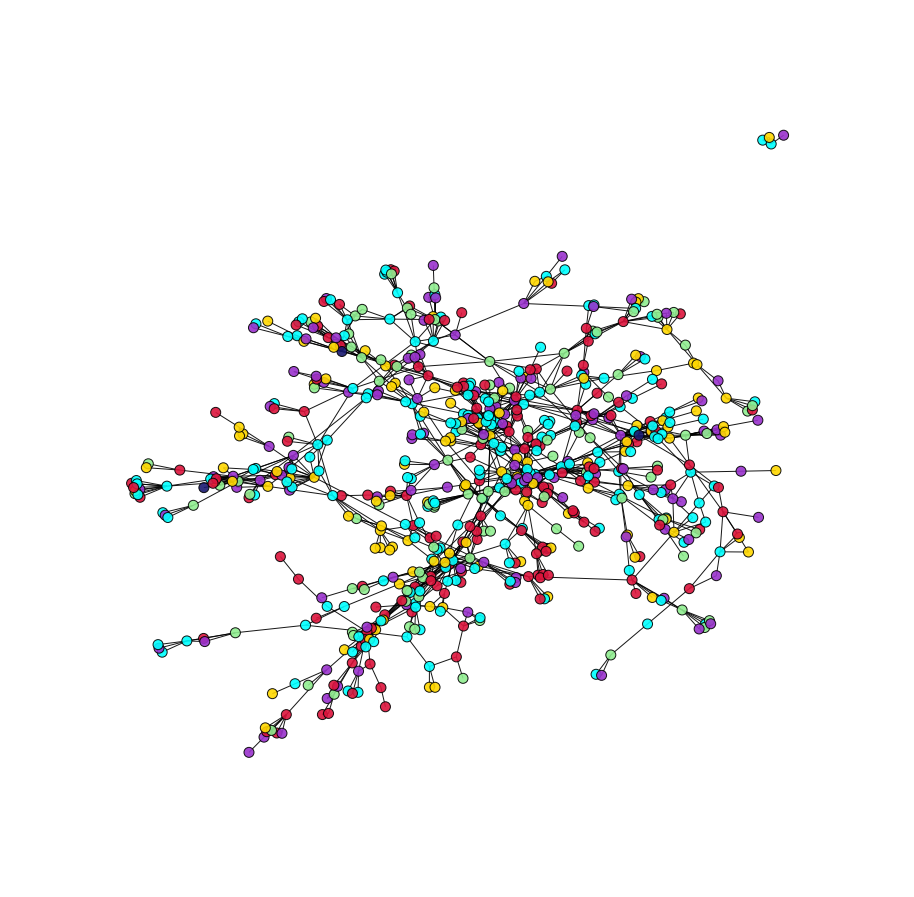

In [627]:
a = {}
for p in partition:
    if partition[p] == 12:
        a[p] = 'crimson'
    if partition[p] == 13:
        a[p] = 'gold'
    if partition[p] == 14:
        a[p] = 'lightgreen'
    if partition[p] == 15:
        a[p] = 'cyan'
    if partition[p] == 16:
        a[p] = 'midnightblue'
    if partition[p] == 17:
        a[p] = 'darkorchid'
Gs = G.subgraph(list(a.keys()))
print(list(a.keys()))
plt.figure(figsize=(12,12))
nx.draw(Gs, with_labels=False, node_color=a.values(), alpha=0.9, node_size=100)

In [628]:
DG=nx.DiGraph(G)
node_census = nx.triadic_census(DG)
x = []
for key in node_census:
    x.append((key, node_census[key]))
pprint(sorted(x,key=lambda a:a[1], reverse=True))

[('003', 23917653327),
 ('102', 75581206),
 ('201', 85087),
 ('300', 48260),
 ('021C', 0),
 ('021D', 0),
 ('210', 0),
 ('120U', 0),
 ('030C', 0),
 ('012', 0),
 ('021U', 0),
 ('120D', 0),
 ('111U', 0),
 ('030T', 0),
 ('120C', 0),
 ('111D', 0)]


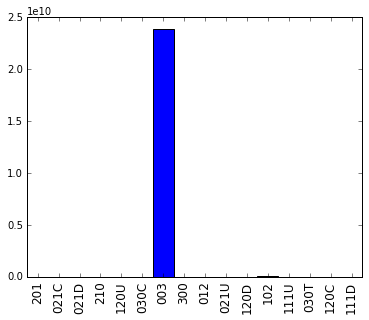

In [642]:
plt.bar(numpy.arange(16),node_census.values(),width=1)
plt.xticks(numpy.arange(16)+0.5, tuple(node_census.keys()),rotation='vertical',fontsize=12)
plt.subplots_adjust(bottom=0.0)
plt.show()

На этой диаграмме не очень хорошо видно соотношения, поэтому прологарифмируем значения по оси Y.

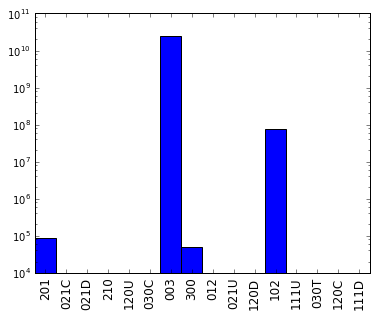

In [643]:
plt.bar(numpy.arange(16),node_census.values(),width=1)
plt.xticks(numpy.arange(16)+0.5, tuple(node_census.keys()),rotation='vertical',fontsize=12)
plt.subplots_adjust(bottom=0.0)
plt.yscale('log')
plt.show()

Теперь соотношения видно намного лучше. Посмотрим транзитивность графа.

In [644]:
node_transitivity = nx.transitivity(DG)
print(node_transitivity)

0.629842474126


Транзитивность этого графа выше, чем у первого, т.е. больше половины триад в графе являются связанными. Это означает, что граф в целом отражает достаточно тесные связи между членами сети: если разбить людей на группы по три человека, больше чем в половине таких групп люди окажутся знакомыми каждый с каждым.